In [33]:
#!/usr/bin/env python
import pandas as pd
from datetime import date, time
import plotly.express as px
import sys

data = pd.read_csv("thpa_vessels_count.csv")
data_Prophet = data


#Utilities
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
daysofweek = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
pallete7_5 = ["#003f5c", "#2f4b7c", "#665191", "#a05195", "#d45087", "#ff7c43", "#ffa600"]
              

print(sys.path)
data_Prophet

fig = px.line(data_Prophet, x="timestamp", y = "vessel_count")
fig.update_layout(height=750, width = 1400)
fig.show()

['C:\\Users\\Nacho\\Desktop\\Predictive_Algorithms\\Nacho\\thpa_traffic\\02_EDA', 'c:\\users\\nacho\\appdata\\local\\programs\\python\\python38-32\\python38.zip', 'c:\\users\\nacho\\appdata\\local\\programs\\python\\python38-32\\DLLs', 'c:\\users\\nacho\\appdata\\local\\programs\\python\\python38-32\\lib', 'c:\\users\\nacho\\appdata\\local\\programs\\python\\python38-32', '', 'c:\\users\\nacho\\appdata\\local\\programs\\python\\python38-32\\lib\\site-packages', 'c:\\users\\nacho\\appdata\\local\\programs\\python\\python38-32\\lib\\site-packages\\win32', 'c:\\users\\nacho\\appdata\\local\\programs\\python\\python38-32\\lib\\site-packages\\win32\\lib', 'c:\\users\\nacho\\appdata\\local\\programs\\python\\python38-32\\lib\\site-packages\\Pythonwin', 'c:\\users\\nacho\\appdata\\local\\programs\\python\\python38-32\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Nacho\\.ipython']


In [34]:
print(sys.executable)

c:\users\nacho\appdata\local\programs\python\python38-32\python.exe


In [35]:
print(sys.path)

['C:\\Users\\Nacho\\Desktop\\Predictive_Algorithms\\Nacho\\thpa_traffic\\02_EDA', 'c:\\users\\nacho\\appdata\\local\\programs\\python\\python38-32\\python38.zip', 'c:\\users\\nacho\\appdata\\local\\programs\\python\\python38-32\\DLLs', 'c:\\users\\nacho\\appdata\\local\\programs\\python\\python38-32\\lib', 'c:\\users\\nacho\\appdata\\local\\programs\\python\\python38-32', '', 'c:\\users\\nacho\\appdata\\local\\programs\\python\\python38-32\\lib\\site-packages', 'c:\\users\\nacho\\appdata\\local\\programs\\python\\python38-32\\lib\\site-packages\\win32', 'c:\\users\\nacho\\appdata\\local\\programs\\python\\python38-32\\lib\\site-packages\\win32\\lib', 'c:\\users\\nacho\\appdata\\local\\programs\\python\\python38-32\\lib\\site-packages\\Pythonwin', 'c:\\users\\nacho\\appdata\\local\\programs\\python\\python38-32\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\Nacho\\.ipython']


<Figure size 1152x1080 with 0 Axes>

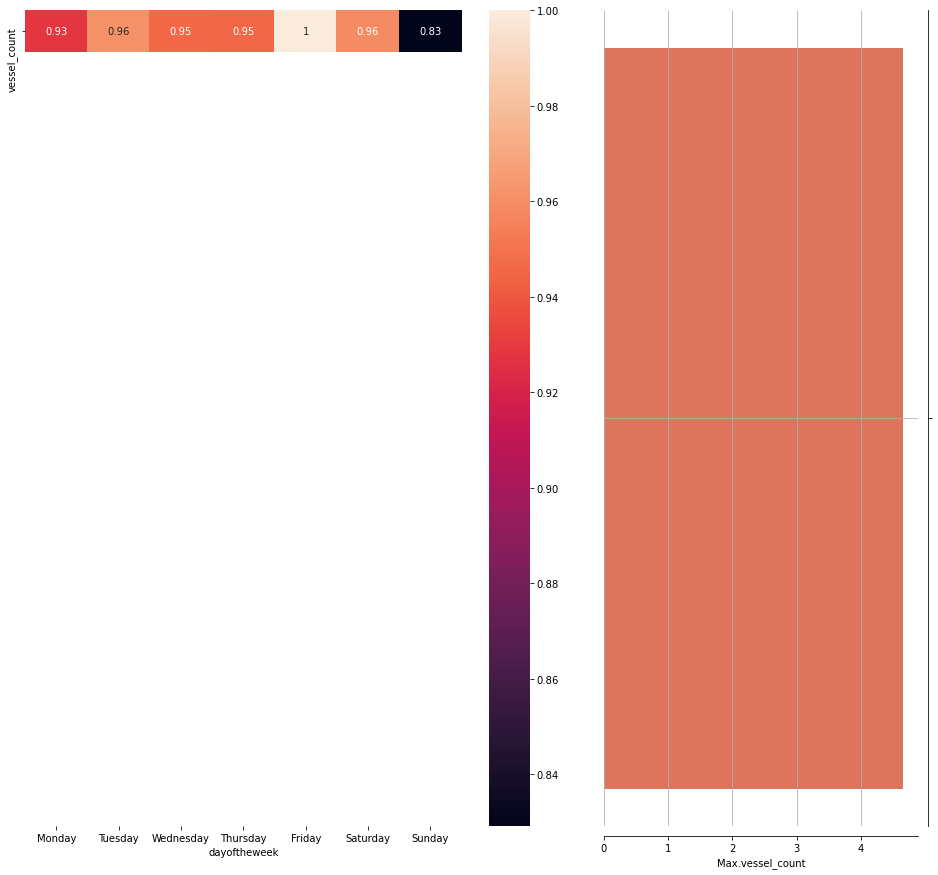

In [36]:
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 15))
grid = plt.GridSpec(1, 8, wspace=0.4, hspace=0.3)

cat_type = CategoricalDtype(categories=daysofweek, ordered = True)

dailyvolume = data_Prophet
dailyvolume["Timestamp"] = pd.to_datetime(dailyvolume["timestamp"])

dailyvolume["dayoftheweek"] = dailyvolume["Timestamp"].dt.strftime('%A')

dailyvolume = dailyvolume.groupby(['dayoftheweek'])['vessel_count'].mean()
dailyvolume = dailyvolume.reset_index()
dailyvolume['dayoftheweek'] = dailyvolume['dayoftheweek'].astype(cat_type)
dailyvolume = pd.pivot_table(dailyvolume, values = 'vessel_count', index = 'dayoftheweek')

plt.figure(figsize=(16, 15))
plt.subplot(grid[0, :5])
ax = sns.heatmap((dailyvolume/dailyvolume.max().T).T, annot = True)
ax.set_ylim(20,0)

plt.subplot(grid[0,5:])
maxvolume = dailyvolume.max()
maxvolume = maxvolume.reset_index().rename(columns = {0: 'Max.vessel_count'})
ax = sns.barplot(data = maxvolume, x = 'Max.vessel_count', color="#f26747")
ax.grid()
sns.despine(ax=ax, offset = 10, left = True, right = False)

arrives here
completes the program


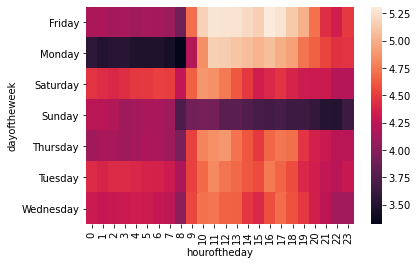

In [37]:
import seaborn as sns
print('arrives here')
hourlyvolume = data_Prophet
hourlyvolume["timestamp"] = pd.to_datetime(hourlyvolume["timestamp"])
hourlyvolume["dayoftheweek"] = hourlyvolume['timestamp'].dt.strftime('%A')
hourlyvolume["houroftheday"] = hourlyvolume['timestamp'].dt.hour
hourlyvolume = hourlyvolume.groupby(['dayoftheweek', 'houroftheday'])['vessel_count'].mean()
hourlyvolume = hourlyvolume.reset_index()
hourlyvolume = pd.pivot_table(hourlyvolume, values = 'vessel_count', index = 'dayoftheweek', columns = 'houroftheday')
ax = sns.heatmap(hourlyvolume)
print('completes the program')

In [38]:
print("part of the code removed")

part of the code removed


In [39]:
import plotly.graph_objects as go

throughday = data_Prophet
throughday["timestamp"] = pd.to_datetime(throughday["timestamp"])
throughday['minutes'] = throughday['timestamp'].dt.minute

throughday_temp = throughday
throughday_temp = throughday_temp.groupby(['dayoftheweek', 'houroftheday', 'minutes'])['vessel_count'].mean()
throughday_temp = throughday_temp.reset_index()

fig = go.Figure()
for day, color in zip( daysofweek, pallete7_5):
        temp = throughday_temp[throughday_temp['dayoftheweek'] == day]
        temp['time'] = temp['houroftheday'].apply(lambda x: str(x)) + ':' + temp['minutes'].apply(lambda x: str(x))
        temp['time'] = pd.to_datetime(temp['time'], format = '%H:%M').dt.time
        fig.add_trace(go.Scatter(x = temp['time'], y = temp['vessel_count'], mode = 'lines', marker_color = color, name =day))
        
        #fig.update_layout(title = go.layout.Title (text = location))
        fig.update_xaxes(dtick=8)
        fig.show()  

  
    
    

<ipython-input-39-772021f18f57>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-39-772021f18f57>:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(12.0, 0.0)

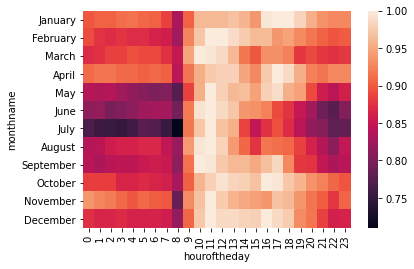

In [42]:
throughyear = data_Prophet
month_type = CategoricalDtype(categories = months, ordered = True)
#throughyear['timestamp'] = pd.to_datetime(throughyear['timestamp'])
#throughyear['time'] = throughyear['timestamp'].dt.time
throughyear['monthname'] = pd.to_datetime(throughyear['timestamp']).dt.strftime('%B').astype(month_type)
throughyear = throughyear.groupby(['monthname', 'houroftheday'])['vessel_count'].mean().reset_index()
throughyear = pd.pivot_table(throughyear, values = 'vessel_count', index = 'monthname', columns = 'houroftheday')

ax = sns.heatmap((throughyear.T/throughyear.T.max()).T)
ax.set_ylim(12,0)

In [30]:
for day in daysofweek:
    plt.figure()
    day_data = data_Prophet[data_Prophet['dayoftheweek']== day]
    day_data['monthname'] = day_data['monthname'].astype(month_type)
    day_data = day_data.groupby(['monthname', 'houroftheday'])['Avg_Speed'].mean().reset_index()
    day_data = pd.pivot_table(day_data, values = 'Avg_Speed', index = 'monthname', columns = 'houroftheday')
    
    ax.get_ylim()
    ax = sns.heatmap((day_data.T/day_data.T.max()).T)
    ax.set_ylim(12,0)
    ax.set_title(day)

KeyError: 'monthname'

<Figure size 432x288 with 0 Axes>